In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# system = 'Rossler'
# n = 10000
# time_span = 5
# time_step = 0.1
# integration_time_step = 0.01
# number_timesteps_predict = 5
# std = 0.01

# name = f"{system}_{n}_{time_span}_{str(time_step).replace('.', '')}_{str(integration_time_step).replace('.', '')}_{number_timesteps_predict}_{str(std).replace('.', '')}"
# filename = f'data_dictionaries/data_{name}.npy'
# dictionary = np.load(filename, allow_pickle=True).item()
# t = np.arange(0, time_span, time_step)
# c = 100

# # Scale the data back up
# maximum_allowed = 100
# all_s = dictionary["observations"]*maximum_allowed
# all_prediction = dictionary["x_transformation_0"][c]*maximum_allowed
# all_delta = all_prediction - all_s[:,-1,:]

In [74]:
system = 'Lorentz'
number_data_points = 10000
time_span = 5
time_step = 0.1
number_timesteps_predict = 5

name = f"{system}_{number_data_points}"
filename = f'data_dictionaries/data_{name}.npy'

dictionary = np.load(filename, allow_pickle=True).item()
t = np.arange(0, time_span, time_step)
c = 100

# Scale the data back up
maximum_allowed = 100
s = dictionary["observations"]*maximum_allowed
prediction = dictionary[f'timesteps_{number_timesteps_predict}']["x_transformation_0"][c]*maximum_allowed
delta = prediction[:-number_timesteps_predict,:] - s[number_timesteps_predict:,:]
print((delta**2).mean())

0.5366664223787018


In [ ]:
# i = 0
# s = all_s[i, :, :]
# prediction = all_prediction[i,:]
# adelta = prediction - s[-1,:]

In [ ]:
# print(all_delta.shape)
# plt.scatter(all_delta[:,0], all_delta[:,1], s=5)
# plt.ylabel('delta_y')
# plt.xlabel('delta_x')
# plt.show()
# plt.scatter(all_delta[:,0], all_delta[:,2], s=5)
# plt.ylabel('delta_z')
# plt.xlabel('delta_x')
# plt.show()
# plt.scatter(all_delta[:,1], all_delta[:,2], s=5)
# plt.ylabel('delta_z')
# plt.xlabel('delta_y')
# plt.show()
# ax = plt.figure().add_subplot(projection='3d')
# ax.plot(all_delta[:,0], all_delta[:,1], all_delta[:,2], linewidth=0.2)
# plt.show()

(9996, 3)


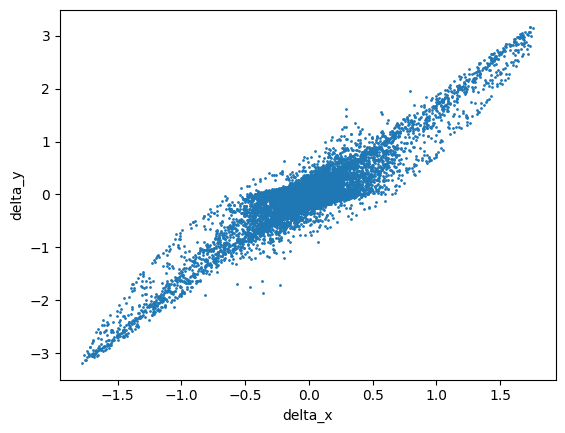

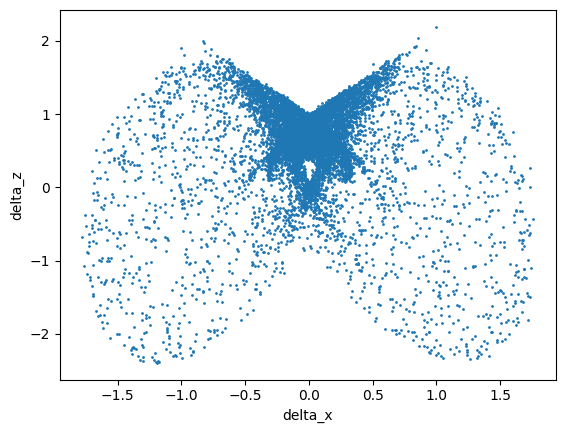

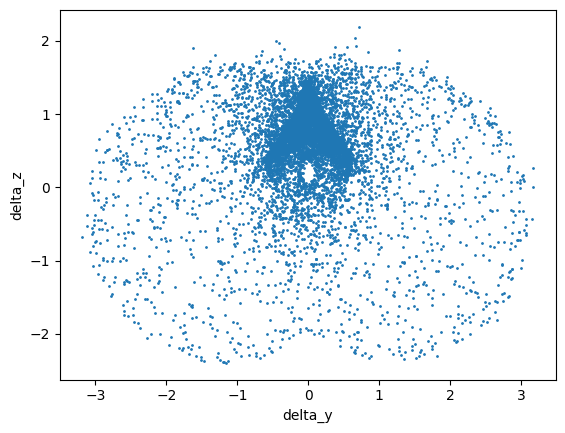

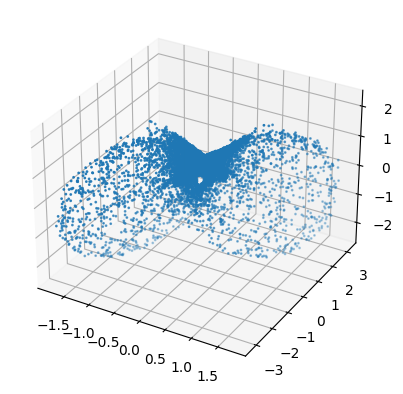

In [78]:
print(delta.shape)
plt.scatter(delta[:,0], delta[:,1], s=1)
plt.ylabel('delta_y')
plt.xlabel('delta_x')
plt.show()
plt.scatter(delta[:,0], delta[:,2], s=1)
plt.ylabel('delta_z')
plt.xlabel('delta_x')
plt.show()
plt.scatter(delta[:,1], delta[:,2], s=1)
plt.ylabel('delta_z')
plt.xlabel('delta_y')
plt.show()
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(delta[:,0], delta[:,1], delta[:,2], s=1)
plt.show()

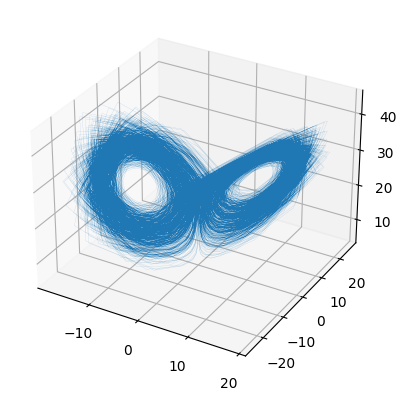

In [15]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(s[:,0], s[:,1], s[:,2], linewidth=0.05)
# ax.scatter(all_s[i,-1,0], all_s[i,-1,1], all_s[i,-1,2], color = 'r')
plt.show()

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(all_s[:,0,0], all_s[:,0,1], all_s[:,0,2], linewidth=0.2)
plt.show()

In [4]:
from load_and_prepare_data_functions import load_and_subsample_series, split_training_data

system = 'Lorentz'
number_data_points = 10000
time_span = 5
time_step = 0.1
number_timesteps_predict = 5
length_of_subsequence = 20
x_transformation_type = 0
c = 1000

observations, predictions = load_and_subsample_series(number_data_points,
                                                      system,
                                                      length_of_subsequence + number_timesteps_predict,
                                                      number_timesteps_predict = number_timesteps_predict,
                                                      x_transformation_type = x_transformation_type,
                                                      c = c)

train_X, test_X, train_answer, test_answer = split_training_data(observations,
                                                                 number_timesteps_predict,
                                                                 predictions = predictions)

In [9]:
((train_answer - train_X['input_pred'])**2).mean()

6.363786930625129e-07